<a href="https://colab.research.google.com/github/CherifArsanious/wrangle-and-analyze-data-project/blob/master/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Analysis-NanoDegree-Udacity-Project-4
## Wrangle-and-Analyze-Data
## Project-done-by-Cherif.Arsanious

## Project-Overview
This project is divided into 3 parts 

1- Wrangle Data

I have to gather data from a csv file prepared by the instructor, a tsv file from a url using the requests library and gather data from twitter api using tweepy. I have to assess the collected data and clean them from dirty and messy data and test to make sure of my cleaning process

2- Storing, analyzing, and visualizing my wrangled data

3- Make 2 reports on my data wrangling efforts and my data analyses and visualizations efforts

First step in my wrangle effort is to import the required libraries that will help me to gather, assess and clean the data

In [0]:
#First I will import the necessary libraries to start my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

In [2]:
#I should get the needed files that contains my csv and tsv file
!git clone https://github.com/CherifArsanious/wrangle-and-analyze-data-project.git

Cloning into 'wrangle-and-analyze-data-project'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 23 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


# Gather

## Our first source of data is twitter_archive.csv file
That file was ready available on Udacity platform and just needed to be imported through the right libraries

In [3]:
twitter_archive=pd.read_csv('wrangle-and-analyze-data-project/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


Our data extends from 15-11-2015 to 1-8-2017 time frame

Lets check the number of rows and columns in our dataframe

In [6]:
#numbers of rows and columns in our dataframe
print('number of rows:{} and number of columns:{}'.format(twitter_archive.shape[0],twitter_archive.shape[1]))

number of rows:2356 and number of columns:17


ok, I will check now more information about the 17 columns

In [7]:
#information about our columns and missing values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Now i will check if there are duplicated rows in our dataframe

In [11]:
twitter_archive.duplicated().all()

False

and apparantly there are no duplicated rows

## Our second source of data is image_prediction.tsv file 
That file was ready to be downloaded through Udacity platform but it was asked to do this task through requests library so i did it by both ways

In [13]:
#The image prediction file was already available in Udacity resources platform and needed only to be imported
image_prediction=pd.read_csv('wrangle-and-analyze-data-project/image-predictions.tsv',sep='\t')
image_prediction.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The other way to import the image_prediction file by requests library

In [0]:
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

In [0]:
import io
df = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')

In [17]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


As usual I will start by checking the number of rows and columns and some initial information about the columns and missing values 

In [18]:
image_prediction.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [19]:
#number of rows and columns in our dataframe
image_prediction.shape

(2075, 12)

I notice there are 281 missing rows when comapring image_prediction dataframe and twitter_archive dataframe

Let's check about duplicated rows and it appears that there are no duplicated rows

In [20]:
image_prediction.duplicated().all()

False

Ok I will start by checking the rows that predicted other stuff than dogs and open their urls to check if these tweets contained dogs pictures or not as based on that I will keep these rows or remove them, and after checking these rows by random check, I found out that these tweets do contain dogs and the model wrongly interpreted them as other stuff

In [21]:
image_prediction.query('p1_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


## Our third source of data is the twitter api
I will use the twitter api itself to collect two additional columns required in this project(retweet_count, favorite_count). I created a develpoment account on twitter and requested access to their api and was granted access. After that I used twwepy library to download tweets json content to a text file and then read them line by line and create my third dataframe which is ret_fav_count.

Using my granted access token to access the twitter api

In [0]:
auth=tweepy.OAuthHandler('ATgQvDLXAG0Y1KYivuXlZQaOh','r2YcOCuK356cwqAAc8U3EZ6vlbc5ZV8P3w0Sb7ag9UuPzMN5bV')
auth.set_access_token('247215662-FQA5CUZpwtzQ1uunDpNT5nAb9GSgnWzOVUYgn5vW','ZES8vhdxjWdUqOvFYKtrwABjpvnkGCk2sFqG4Grj6xLsb')
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [23]:
tweet=api.get_status(666049248165822465,tweet_mode='extended')
#i will check the different attributes 
tweet

Status(_api=<tweepy.api.API object at 0x7fb13759e080>, _json={'created_at': 'Mon Nov 16 00:24:50 +0000 2015', 'id': 666049248165822465, 'id_str': '666049248165822465', 'full_text': 'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq', 'truncated': False, 'display_text_range': [0, 120], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'url': 'https://t.co/4B7cOc1EDq', 'display_url': 'pic.twitter.com/4B7cOc1EDq', 'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'medium

In [25]:
#getting to know the json attributes
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Nov 16 00:24:50 +0000 2015',
 'display_text_range': [0, 120],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/4B7cOc1EDq',
    'expanded_url': 'https://twitter.com/dog_rates/status/666049248165822465/photo/1',
    'id': 666049244999131136,
    'id_str': '666049244999131136',
    'indices': [97, 120],
    'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg',
    'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 768},
     'medium': {'h': 1024, 'resize': 'fit', 'w': 768},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/4B7cOc1EDq'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/4B7cOc1EDq',
    'expanded_url': 'https://twitter.com/dog

In [26]:
tweet._json['id']

666049248165822465

In [27]:
tweet._json['favorite_count']

99

In [28]:
tweet._json['retweet_count']

41

Okay now that i am familiar with the twitter api attributes, I will do the big step of importing all the tweets json content in a 'tweet_json.txt'

After consulting the udacity help communities and mentor community and many trial and error from my side, i finally reached this code.

In [29]:
#I will create a tweet_json.txt where i will store the tweets json content in it
fails_dict={}
with open('tweet_json.txt', 'w') as outfile:
    for i,id in enumerate(twitter_archive['tweet_id']):
        try:
            tweet = api.get_status(id,tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            print(i,'success')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dict[id]=e
            pass

0 success
1 success
2 success
3 success
4 success
5 success
6 success
7 success
8 success
9 success
10 success
11 success
12 success
13 success
14 success
15 success
16 success
17 success
18 success
Fail
20 success
21 success
22 success
23 success
24 success
25 success
26 success
27 success
28 success
29 success
30 success
31 success
32 success
33 success
34 success
35 success
36 success
37 success
38 success
39 success
40 success
41 success
42 success
43 success
44 success
45 success
46 success
47 success
48 success
49 success
50 success
51 success
52 success
53 success
54 success
55 success
56 success
57 success
58 success
59 success
60 success
61 success
62 success
63 success
64 success
65 success
66 success
67 success
68 success
69 success
70 success
71 success
72 success
73 success
74 success
75 success
76 success
77 success
78 success
79 success
80 success
81 success
82 success
83 success
84 success
85 success
86 success
87 success
88 success
89 success
90 success
91 success
92 s

Rate limit reached. Sleeping for: 150


899 success
900 success
901 success
902 success
903 success
904 success
905 success
906 success
907 success
908 success
909 success
910 success
911 success
912 success
913 success
914 success
915 success
916 success
917 success
918 success
919 success
920 success
921 success
922 success
923 success
924 success
925 success
926 success
927 success
928 success
929 success
930 success
931 success
Fail
933 success
934 success
935 success
936 success
937 success
938 success
939 success
940 success
941 success
942 success
943 success
944 success
945 success
946 success
947 success
948 success
949 success
950 success
951 success
952 success
953 success
954 success
955 success
956 success
957 success
958 success
959 success
960 success
961 success
962 success
963 success
964 success
965 success
966 success
967 success
968 success
969 success
970 success
971 success
972 success
973 success
974 success
975 success
976 success
977 success
978 success
979 success
980 success
981 success
982 success

Rate limit reached. Sleeping for: 598


1799 success
1800 success
1801 success
1802 success
1803 success
1804 success
1805 success
1806 success
1807 success
1808 success
1809 success
1810 success
1811 success
1812 success
1813 success
1814 success
1815 success
1816 success
1817 success
1818 success
1819 success
1820 success
1821 success
1822 success
1823 success
1824 success
1825 success
1826 success
1827 success
1828 success
1829 success
1830 success
1831 success
1832 success
1833 success
1834 success
1835 success
1836 success
1837 success
1838 success
1839 success
1840 success
1841 success
1842 success
1843 success
1844 success
1845 success
1846 success
1847 success
1848 success
1849 success
1850 success
1851 success
1852 success
1853 success
1854 success
1855 success
1856 success
1857 success
1858 success
1859 success
1860 success
1861 success
1862 success
1863 success
1864 success
1865 success
1866 success
1867 success
1868 success
1869 success
1870 success
1871 success
1872 success
1873 success
1874 success
1875 success

In [30]:
required_columns = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        python_format = json.loads(line)
        required_columns.append({'tweet_id':python_format['id'],
                              'favorites':python_format['favorite_count'],
                              'retweets':python_format['retweet_count'],
                              'timestamp':python_format['created_at']})
ret_fav_count=pd.DataFrame(required_columns,columns=['tweet_id','favorites','retweets','timestamp'])
ret_fav_count.head(20)

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,36550,7783,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,31477,5765,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23734,3816,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39859,7947,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,38069,8584,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,19153,2865,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,11161,1877,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,61606,17370,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,26384,3953,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,30159,6766,Wed Jul 26 15:59:51 +0000 2017


In [0]:
#I will store the dataframe that i created from twitter in a csv file to save 
#time next time i open this notebook so that i don't have 
#to run the previous steps each time
ret_fav_count.to_csv('ret_fav_count.csv',index=False)

Now I will assess our third source of data by checking its numbers of rows and columns and getting information about columns types and missing values and checking for duplicated rows and inspecting the file on google sheets for further inspection

In [33]:
ret_fav_count.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,36550,7783,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,31477,5765,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23734,3816,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,39859,7947,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,38069,8584,Sat Jul 29 16:00:24 +0000 2017


In [35]:
#number of rows and columns in our datafrmae
ret_fav_count.shape

(2331, 4)

Now lets see the information about the columns

In [37]:
ret_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
timestamp    2331 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


I don't have duplicated rows in this dataframe

In [38]:
ret_fav_count.duplicated().all()

False

# Assessing
## Quality
- timestamp in twitter_archive is of type object and not timedate
- 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns in twitter_archive are all missing values and are of no signicficance to our analysis 
- None values in name column in twitter_archive instead of np.nan
- 'a' values in name column in twitter_archive instead of np.nan
- None values in dogs stages are not interpreted as np.nan in twitter_archive
- dogs' breeds are not consistent ( some are capital and some are not) in image_prediction dataframe
- timestamp should be treated as timestamp not object type
- 'p1' column name in image_prediction dataframe is not a suitable name to indicate that this column is dog breed predicted. It is a confusing name
- 'p2' is a confusing name and not indicating dog breed indincated
- 'p2-dog' is a confusing name to indicate that it is the probability of being a dog or not
- Do i need all the columns in image_prediction data frame
- image_prediction assumed that some images don't belong to dogs and interpreted other stuff than dogs and which is not true 
- timestamp in ret_fav_count dataframe of object type 
## Tidiness
- 3 tables that have common columns 
- doggo, floofer, pupper, puppo should be stacked in one column

# Cleaning and Testing Step

I will first create three copies of our three dataframes to start the cleaning process without missing with the original dataframe

In [0]:
#making new copies of our dataframes to start the cleaning process
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean=image_prediction.copy()
ret_fav_count_clean=ret_fav_count.copy()

### 1- change timestamp in twitter_archive is from type object to type timedate

In [0]:
#converting timestamp type from object to datetime
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

Test

In [107]:
#test our cleaning step
twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### 2- drop 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns in twitter_archive as they are all missing values and are of no signicficance to our analysis

In [108]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [0]:
twitter_archive_clean=twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],axis=1)

Test

In [110]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 3- Replace None values in name column in twitter_archive with np.nan

In [111]:
#Although they are 745 missing names in name columns but python can't detect them as they are written as None
twitter_archive_clean.name.isnull().all()

False

In [112]:
twitter_archive_clean.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Eugene       1
Dwight       1
Sailer       1
Banjo        1
Crimson      1
Name: name, Length: 957, dtype: int64

In [0]:
twitter_archive_clean.name=twitter_archive_clean.name.replace('None',np.nan)

Test

In [114]:
twitter_archive_clean.name.value_counts()

a          55
Charlie    12
Lucy       11
Oliver     11
Cooper     11
           ..
Eugene      1
Dwight      1
Sailer      1
Banjo       1
Crimson     1
Name: name, Length: 956, dtype: int64

### 3- Replace 'a' values in name column in twitter_archive with of np.nan

In [0]:
twitter_archive_clean.name=twitter_archive_clean.name.replace('a',np.nan)

Test

In [116]:
twitter_archive_clean.name.value_counts()

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Penny      10
           ..
Daniel      1
Eugene      1
Dwight      1
Sailer      1
Crimson     1
Name: name, Length: 955, dtype: int64

### 4- Replace None values in doggo column with np.nan in twitter_archive

In [0]:
twitter_archive_clean.doggo=twitter_archive_clean.doggo.replace('None',np.nan)

Test

In [118]:
twitter_archive_clean.doggo

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: doggo, Length: 2356, dtype: object

### 5- Replace None values in floofer column in twitter_archive data frame with np.nan

In [119]:
twitter_archive_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [0]:
twitter_archive_clean.floofer=twitter_archive_clean.floofer.replace('None',np.nan)

Test

In [121]:
twitter_archive_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

### 6- Replace None values in pupper coloumn with np.nan

In [122]:
twitter_archive_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [0]:
twitter_archive_clean.pupper=twitter_archive_clean.pupper.replace('None',np.nan)

Test

In [124]:
twitter_archive_clean.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

### 7- Replace None values in puppo column with np.nan

In [125]:
twitter_archive_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [0]:
twitter_archive_clean.puppo=twitter_archive_clean.puppo.replace('None',np.nan)

Test

In [127]:
twitter_archive_clean.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

### 8- make breed name consistent with lower case only( some are capital and some are not) in image_prediction dataframe

In [128]:
image_prediction_clean.p1.head(20)

0     Welsh_springer_spaniel
1                    redbone
2            German_shepherd
3        Rhodesian_ridgeback
4         miniature_pinscher
5       Bernese_mountain_dog
6                 box_turtle
7                       chow
8              shopping_cart
9           miniature_poodle
10          golden_retriever
11             Gordon_setter
12              Walker_hound
13                       pug
14                bloodhound
15                     Lhasa
16            English_setter
17                       hen
18          desktop_computer
19         Italian_greyhound
Name: p1, dtype: object

In [0]:
image_prediction_clean.p1=image_prediction_clean.p1.str.lower()

Test

In [130]:
image_prediction_clean.p1.head(20)

0     welsh_springer_spaniel
1                    redbone
2            german_shepherd
3        rhodesian_ridgeback
4         miniature_pinscher
5       bernese_mountain_dog
6                 box_turtle
7                       chow
8              shopping_cart
9           miniature_poodle
10          golden_retriever
11             gordon_setter
12              walker_hound
13                       pug
14                bloodhound
15                     lhasa
16            english_setter
17                       hen
18          desktop_computer
19         italian_greyhound
Name: p1, dtype: object

### 9- change 'p1' column name in image_prediction dataframe which is not a suitable name to indicate that this column is dog breed predicted. It is a confusing name so I will replace with breed_prediction_1

In [131]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [0]:
image_prediction_clean=image_prediction_clean.rename(columns={'p1':'dog_breed'})

In [133]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### 10- Drop columns ['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], since by inspection on google sheets, theses columns are prediction other stuff than dogs so they are not reliable to our project as by random inspection all tweets contained dogs picture and we are only interesting in dogs breeds in this dataframe so they are quality data for me and i will drop these columns

In [0]:
image_prediction_clean=image_prediction_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

Test

In [135]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'p1_conf', 'p1_dog'], dtype='object')

### 11- Change ['p1_conf','p1_dog'] to ['prediction_confidence','dog'] respectively

In [0]:
image_prediction_clean=image_prediction_clean.rename(columns={'p1_conf':'prediction_confidence','p1_dog':'dog'})

Test

In [137]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence',
       'dog'],
      dtype='object')

### 12- change the values in breed column that do not belong to dogs to np.nan
image_prediction assumed that some images don't belong to dogs and interpreted other stuff than dogs and which is not true

In [138]:
image_prediction_clean.query('dog==False')

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence,dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False


by random inspection of these urls, I found that they contained dogs picture and the model failed to predict them so I need to change these breed values to np.nan

In [0]:
not_breed=list(image_prediction_clean.query('dog==False')['dog_breed'])

In [0]:
image_prediction_clean['dog_breed']=image_prediction_clean['dog_breed'].replace(not_breed,np.nan)

Test

In [141]:
image_prediction_clean.query('dog==False')

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence,dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,NaN,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,NaN,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,NaN,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,NaN,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,NaN,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,NaN,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,0.170278,False


### 13- Drop dog column now that we don't need it anymore

In [0]:
image_prediction_clean=image_prediction_clean.drop(['dog'],axis=1)

Test

In [143]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence'], dtype='object')

### 14- Change 'name' column name to 'dog_name' to avoid confusion

In [0]:
twitter_archive_clean=twitter_archive_clean.rename(columns={'name':'dog_name'})

Test

In [145]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### 15- change timestamp type from object to datetime in ret_fav_count dataframe

In [0]:
ret_fav_count['timestamp']=pd.to_datetime(ret_fav_count['timestamp'])

Test

In [147]:
ret_fav_count.timestamp.dtypes

datetime64[ns, UTC]

### 16- Adding a new rating_value column in twitter_archive dataframe
I did this step because i found that many users did not folow the standard denominator of 10 and they used their own ratio score so either loose all these data or create a new ratio value column and depend on it instead of depending on the rating_numerator because for example 210/190 can be reasonably compared to 14/10 but to compare 210 to 14 is not fair and misleading

In [148]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [154]:
#You can see that the extreme values are not due to typos or wrong data extraction 
df2= twitter_archive_clean.query('rating_numerator >= 20')
df2[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
902,758467244762497024,Why does this never happen at my front door......,165,150


In [155]:
twitter_archive_clean['rating_value']=twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']
twitter_archive_clean['rating_value'].sample(5)

1440    1.2
1982    1.1
1455    1.0
1075    1.2
1710    0.8
Name: rating_value, dtype: float64

## Clean step2
### Tidiness
### Stack dog stages in one column

In [156]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating_value'],
      dtype='object')

In [0]:
#this code did not work for me and created a 4 times bigger dataframe that i could not handle so i had to think of another solution
#twitter_archive_clean=pd.melt(twitter_archive_clean,id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 'dog_name'],value_vars=['doggo',
#'floofer', 'pupper', 'puppo'],var_name='dog_stage')

### This cleaning step combines both a quality cleaning issue and a tidiness issue

the documentation in this website helped me
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html

In [0]:
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in dog_stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
#concat the four strings together
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)


twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

Test

In [158]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'rating_value',
       'stage'],
      dtype='object')

In [159]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,rating_value,stage
1127,729838605770891264,2016-05-10 01:00:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",https://twitter.com/dog_rates/status/729838605...,12,10,NaN,1.2,NaN
162,860524505164394496,2017-05-05 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,1.3,NaN
773,776249906839351296,2016-09-15 02:42:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,https://twitter.com/dog_rates/status/700747788...,11,10,very,1.1,NaN
988,748977405889503236,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,10,10,not,1.0,NaN
252,844973813909606400,2017-03-23 18:07:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,https://twitter.com/dog_rates/status/844973813...,12,10,Brady,1.2,NaN


In [0]:
twitter_archive_master=pd.merge(left=twitter_archive_clean,right=image_prediction_clean,on='tweet_id')

In [0]:
twitter_archive_master=pd.merge(left=twitter_archive_master,right=ret_fav_count_clean, on='tweet_id')

In [170]:
twitter_archive_master.sample(10)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,rating_value,stage,jpg_url,img_num,dog_breed,prediction_confidence,favorites,retweets,timestamp_y
632,773191612633579521,2016-09-06 16:10:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Grey. He's the dogtor in charge of you...,https://twitter.com/dog_rates/status/773191612...,12,10,Grey,1.2,NaN,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,blenheim_spaniel,0.427766,10221,4242,2016-09-06 16:10:20+00:00
550,786595970293370880,2016-10-13 15:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,1.1,NaN,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,pembroke,0.709512,9699,3212,2016-10-13 15:54:28+00:00
1299,688828561667567616,2016-01-17 21:01:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,0.9,NaN,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,cardigan,0.614231,1393,372,2016-01-17 21:01:41+00:00
294,827600520311402496,2017-02-03 19:31:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tucker. It's his birthday. He's pupset wi...,https://twitter.com/dog_rates/status/827600520...,13,10,Tucker,1.3,NaN,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,pembroke,0.325638,7559,960,2017-02-03 19:31:54+00:00
1535,676588346097852417,2015-12-15 02:23:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,0.5,NaN,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,boston_bull,0.976577,2300,776,2015-12-15 02:23:26+00:00
1808,670691627984359425,2015-11-28 19:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,https://twitter.com/dog_rates/status/670691627...,8,10,Ester,0.8,NaN,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,shetland_sheepdog,0.071124,579,234,2015-11-28 19:51:59+00:00
1711,672475084225949696,2015-12-03 17:58:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,0.8,NaN,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,NaN,0.879286,1406,680,2015-12-03 17:58:48+00:00
1406,682047327939461121,2015-12-30 03:55:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,https://twitter.com/dog_rates/status/682047327...,10,10,NaN,1.0,NaN,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,NaN,0.364095,3217,940,2015-12-30 03:55:29+00:00
78,874296783580663808,2017-06-12 16:06:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,1.3,NaN,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,24731,3807,2017-06-12 16:06:11+00:00
471,798673117451325440,2016-11-15 23:44:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I shall call him squishy and he...,https://twitter.com/dog_rates/status/675501075...,13,10,NaN,1.3,NaN,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,NaN,0.806757,0,5736,2016-11-15 23:44:44+00:00


In [171]:
twitter_archive_master.shape

(2059, 17)

### Reassess 
### I will rearrange columns for better convenience 

In [172]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp_x', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'rating_value',
       'stage', 'jpg_url', 'img_num', 'dog_breed', 'prediction_confidence',
       'favorites', 'retweets', 'timestamp_y'],
      dtype='object')

In [174]:
twitter_archive_master=twitter_archive_master[['tweet_id','favorites', 'retweets','dog_name','dog_breed','stage','rating_numerator', 'rating_denominator','rating_value', 'source', 'text', 'expanded_urls', 'jpg_url', 'img_num', 'prediction_confidence', 'timestamp_y','timestamp_x']]
twitter_archive_master.sample(10)

,tweet_id,favorites,retweets,dog_name,dog_breed,stage,rating_numerator,rating_denominator,rating_value,source,text,expanded_urls,jpg_url,img_num,prediction_confidence,timestamp_y,timestamp_x
1212,695409464418041856,8735,3596,Bob,pug,NaN,10,10,1.0,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He just got back from his job int...,https://twitter.com/dog_rates/status/695409464...,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,0.997445,2016-02-05 00:51:51+00:00,2016-02-05 00:51:51+00:00
1293,689154315265683456,3100,1007,NaN,cocker_spaniel,NaN,9,10,0.9,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,https://twitter.com/dog_rates/status/689154315...,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,0.816044,2016-01-18 18:36:07+00:00,2016-01-18 18:36:07+00:00
548,786709082849828864,18759,6303,Logan,pomeranian,NaN,75,10,7.5,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,0.467321,2016-10-13 23:23:56+00:00,2016-10-13 23:23:56+00:00
69,877316821321428993,25969,4797,Dante,saluki,NaN,13,10,1.3,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,0.509967,2017-06-21 00:06:44+00:00,2017-06-21 00:06:44+00:00
874,738885046782832640,3798,1149,Charles,NaN,NaN,11,10,1.1,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,https://twitter.com/dog_rates/status/738885046...,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,0.878320,2016-06-04 00:08:17+00:00,2016-06-04 00:08:17+00:00
1007,714141408463036416,4335,1405,NaN,labrador_retriever,NaN,10,10,1.0,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",https://twitter.com/dog_rates/status/714141408...,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,0.586951,2016-03-27 17:25:54+00:00,2016-03-27 17:25:54+00:00
1423,681242418453299201,1498,533,Champ,NaN,NaN,10,10,1.0,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,https://twitter.com/dog_rates/status/681242418...,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,0.255934,2015-12-27 22:37:04+00:00,2015-12-27 22:37:04+00:00
1853,669923323644657664,228,53,NaN,NaN,NaN,10,10,1.0,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,0.343063,2015-11-26 16:59:01+00:00,2015-11-26 16:59:01+00:00
641,772102971039580160,4087,956,Penny,pembroke,NaN,11,10,1.1,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,https://twitter.com/dog_rates/status/772102971...,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,0.541780,2016-09-03 16:04:27+00:00,2016-09-03 16:04:27+00:00
1120,703769065844768768,3304,1151,NaN,boxer,NaN,10,10,1.0,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,https://twitter.com/dog_rates/status/703769065...,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2,0.838994,2016-02-28 02:29:55+00:00,2016-02-28 02:29:55+00:00


In [223]:
twitter_archive_master.rating_value.isnull().all()

False

### Storing
I will store the twitter_archive_master as a csv file and also a database table

In [0]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [0]:
from sqlalchemy import create_engine

In [0]:
engine = create_engine('sqlite:///twitter_archive_master.db')

In [0]:
twitter_archive_master.to_sql('master',engine,index=False)

# Analysis and Visualizations

In [189]:
twitter_archive_master.rating_value.value_counts()

1.200000      475
1.000000      429
1.100000      419
1.300000      275
0.900000      151
0.800000       95
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: rating_value, dtype: int64

In [200]:
twitter_archive_master.query('rating_value > 1.5').tweet_id.index

Int64Index([406, 548, 603, 789, 1438, 1781], dtype='int64')

In [0]:
twitter_archive_master=twitter_archive_master.drop([406, 548, 603, 789, 1438, 1781],axis=0)

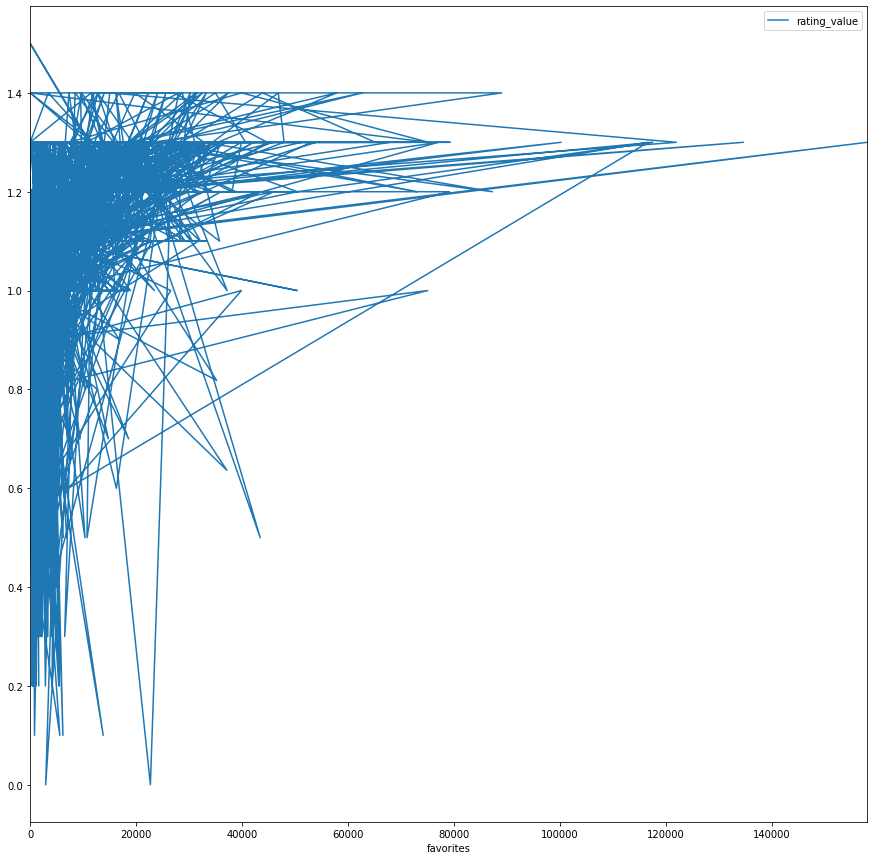

In [203]:
twitter_archive_master.plot(x='favorites',y='rating_value',kind='line',figsize=(15,15))

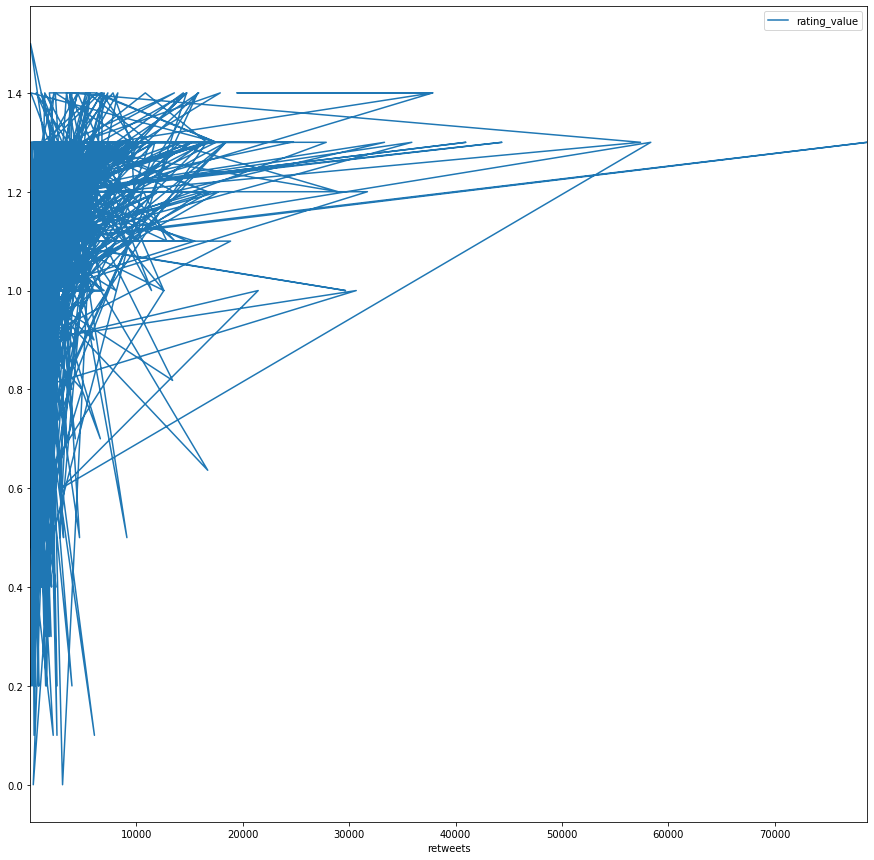

In [204]:
twitter_archive_master.plot(x='retweets',y='rating_value',kind='line',figsize=(15,15))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


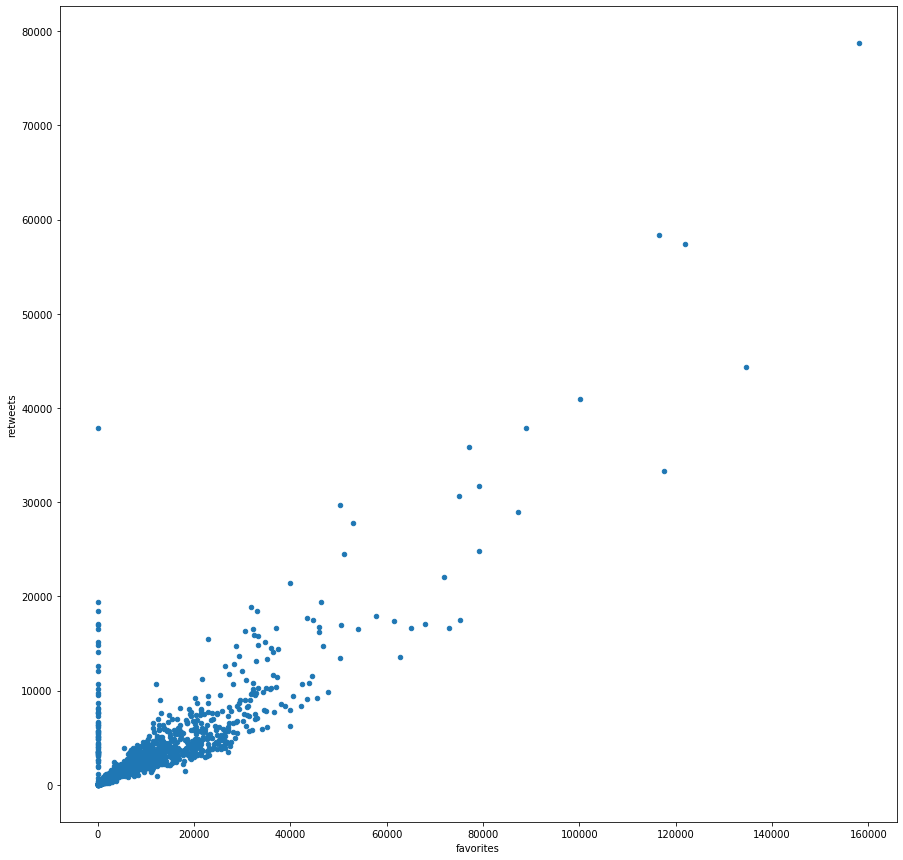

In [214]:
twitter_archive_master.plot(x='favorites',y='retweets',kind='scatter',figsize=(15,15));